# Week 3: Day 5 AM // Time Series Analysis

A time series is a series of data points indexed in time order. Time series resolution is the frequency that data is recorded. For example, heart rate measurements (in units of beats per minute) occur at 0.5 second intervals, so that the length of each series is exactly 15 minutes. Stock data resolution can have different resolution depending on frequency of which data is recorded like: second, minute, hour etc.

Time-series come in all shapes and sizes, but there are a number of very common patterns. They are trend, seasonality, and noise.

- Trend: describes whether the time series is decreasing, constant, or increasing over time.
- Seasonality: describes the periodic signal in your time series.
- Noise: describes what remains behind the separation of seasonality and trend from the time series. In other words, it’s the variability in the data that cannot be explained by the model.

## Trend
Describes whether the time series is decreasing, constant, or increasing over time.

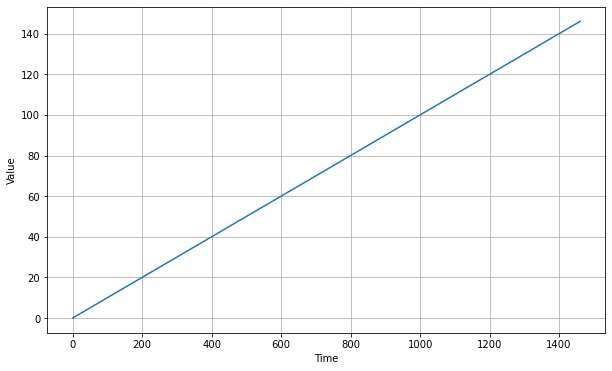

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def trend(time, slope=0):
    return slope * time

def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

time = np.arange(4 * 365 + 1)
baseline = 10
series = trend(time, 0.1)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

## Seasonality
Describes the periodic signal in your time series.

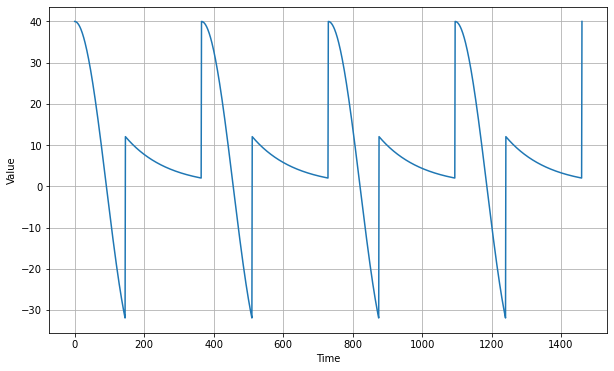

In [2]:
def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

baseline = 10
amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

Now let's create a time series with both trend and seasonality:

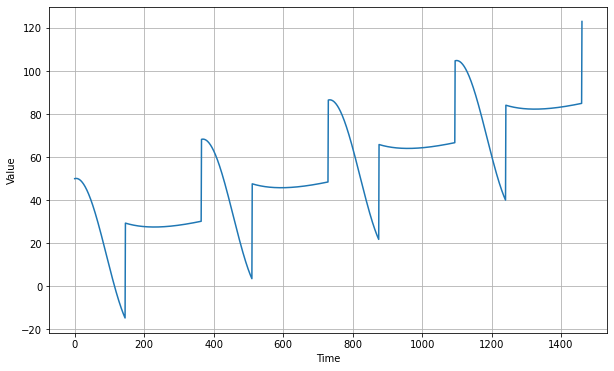

In [3]:
slope = 0.05
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

## Noise
(Some literatures name it residual or error) Describes what remains behind the separation of seasonality and trend from the time series. In other words, it’s the variability in the data that cannot be explained by the model.

In practice few real-life time series have such a smooth signal. They usually have some noise, and the signal-to-noise ratio can sometimes be very low. Let's generate some white noise:

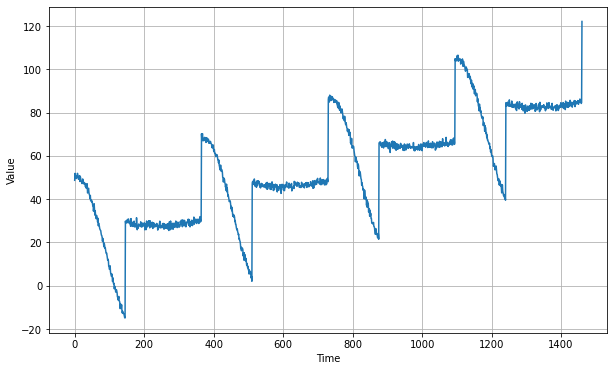

In [4]:
def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

series += noise(time)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

## Time Series Decomposition
In order to analyse the time series data, we have to look at the components or in other word, we decompose the components from the time series. There are two models that describe a time series, which are additive and multiplicative model. A rule of thumb for selecting the right model is to see in our plot if the trend and seasonal variation are relatively constant over time, in other words, linear. If yes, then we will select the Additive model. Otherwise, if the trend and seasonal variation increase or decrease over time then we use the Multiplicative model. Each model has following format:
- Additive: Time Series = Trend + Seasonality + Noise
- Multiplicative: Time Series = Trend * Seasonality * Noise

To do the time series decomposition, fortunately, Python can handle it using seasonal_decompose function in statsmodels.tsa.seasonal

In the cell below, we try to decompose an airline passengers time series data. The data provided on https://github.com/anejad/QuantJam_Notebooks/blob/main/data/AirPassengers.csv

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

passenger=pd.read_csv('https://raw.githubusercontent.com/anejad/QuantJam_Notebooks/main/data/AirPassengers.csv')
passenger

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [6]:
passenger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


Text(0, 0.5, 'Num of Passengers')

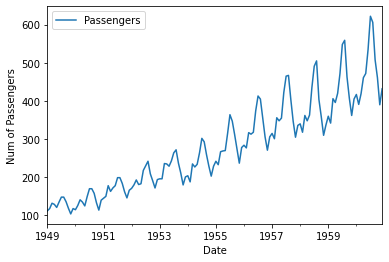

In [7]:
#In order to touch up the table, we change the columns name and also we change dtype of Date into datetime type
passenger.columns=['Date','Passengers']
passenger.Date=pd.to_datetime(passenger.Date)
passenger.set_index('Date',inplace=True)
passenger.plot()
plt.xlabel('Date')
plt.ylabel('Num of Passengers')

In [10]:
passenger

,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


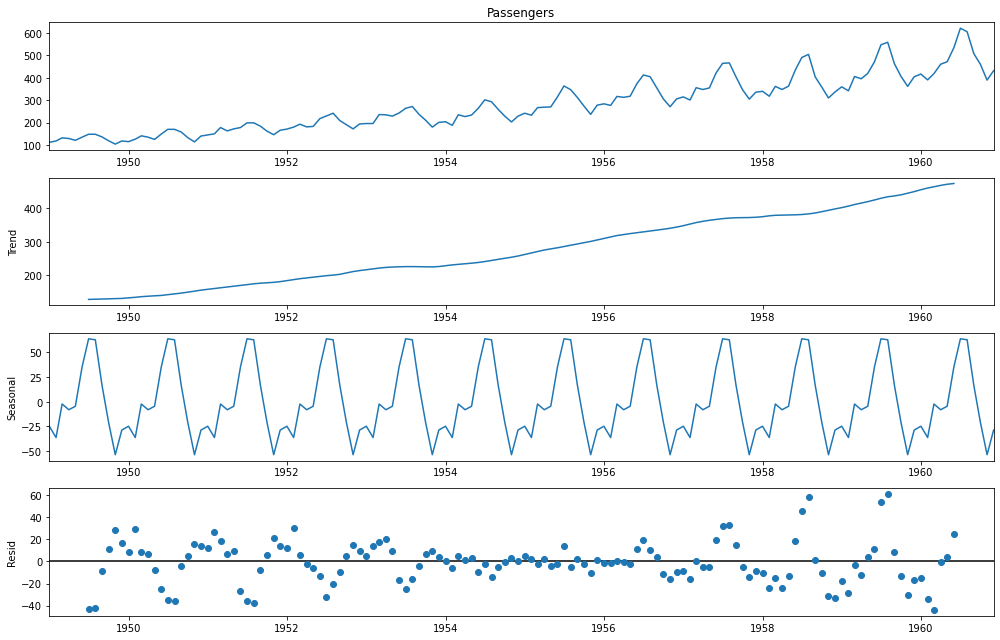

In [8]:
#Start to decompose
import pylab
pylab.rcParams['figure.figsize'] = (14, 9)
#We try to look at the data in yearly period, since the data are in monthly period, we aggregate it into 12 period
res = seasonal_decompose(passenger['Passengers'],model='additive', period=12)
ax=res.plot()
plt.show()

According to the decomposition result above, the trend is linear and the seasonal doesn't change over the time, in other words constant. Therefore, we model our time series data using additive model instead of multiplicative. In the cell below, the example of multiplicative data shown. The data are the natural gas price data which can be accessed from https://www.eia.gov/dnav/ng/hist_xls/RNGWHHDm.xls. We perform the time series decomposition using seasonal_decompose, same as what we did previously. For the first approach, we model the data with additive model.

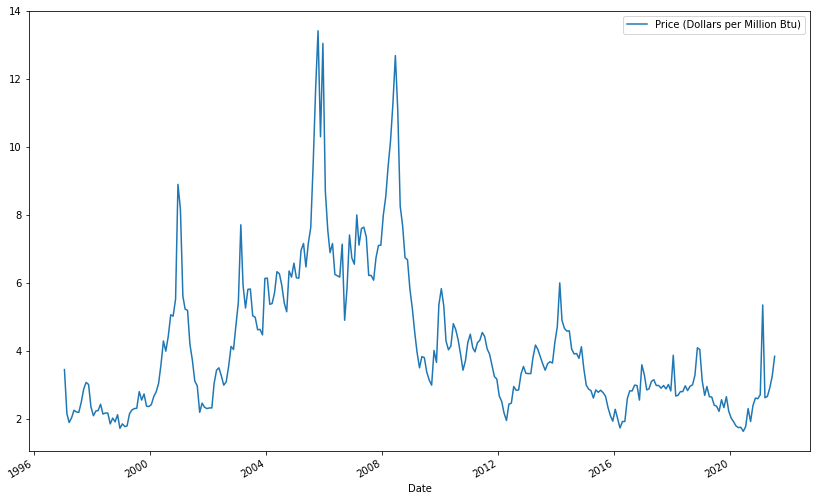

In [14]:
nat_gas=pd.read_excel('/Users/fahmimn21/Downloads/RNGWHHDm.xls',sheet_name='Data 1',header=2)
nat_gas.columns=['Date','Price (Dollars per Million Btu)']
nat_gas.Date=pd.to_datetime(nat_gas.Date)
nat_gas.set_index('Date',inplace=True)
nat_gas.plot()
plt.show()

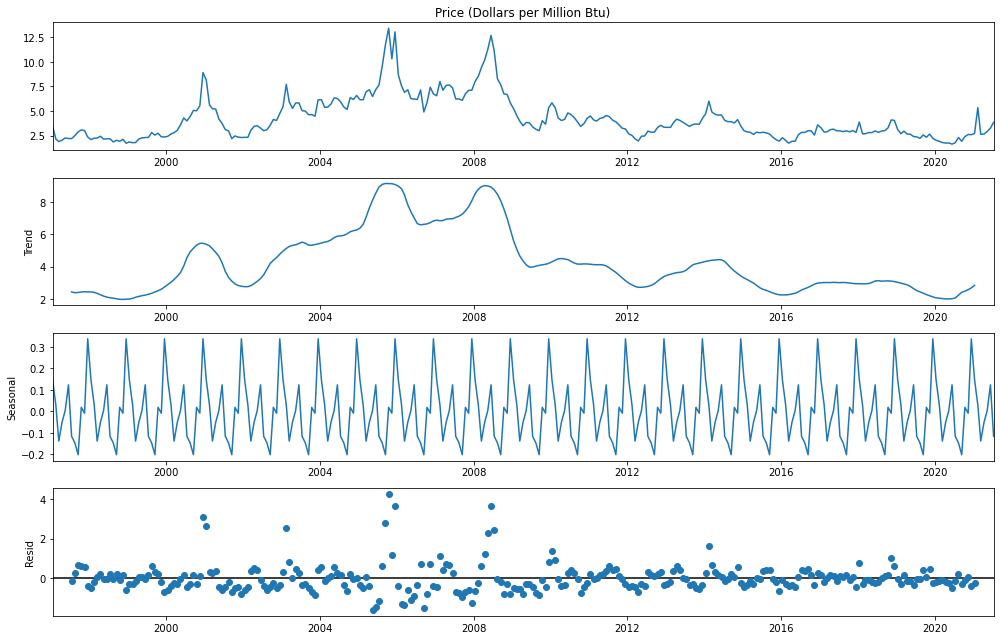

In [15]:
res = seasonal_decompose(nat_gas['Price (Dollars per Million Btu)'],model='additive',period=12)
ax=res.plot()
plt.show()

You can see that the trend is change variously over the time and it is an evidence of multiplicative time series. However, the seasonality is still constant and it is opposed to the fact that seasonality is not constant for the multiplicative model. Then, we have to look at the multiplicative model to make sure that we can find the variety of seasonality.

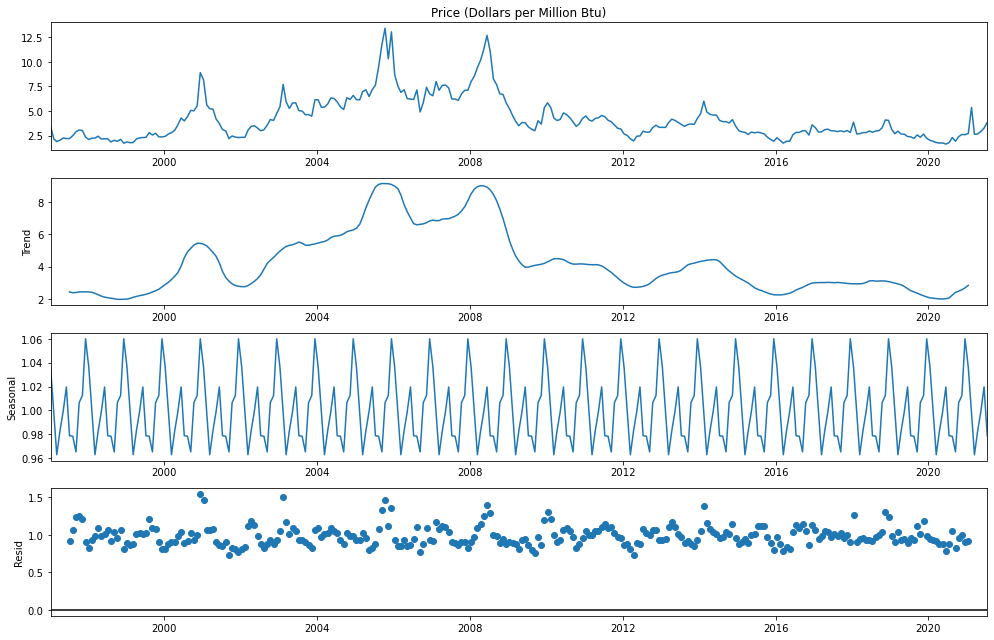

In [16]:
res = seasonal_decompose(nat_gas['Price (Dollars per Million Btu)'],model='multiplicative',period=12)
ax=res.plot()
plt.show()

Unfortunately, we found the constant seasonality. The seasonal_decompose model has an advantage that is explainability and the constant pattern extraction. This method is a naïve decomposition and often more sophisticated method such as STL is preferred to decompose time series. The STL methods takes advantage of LOESS (Local regression) a nonparametric technique that uses local weighted regression to fit a smooth curve through points in a scatter plot. The seasonal component is allowed to change over time, and the rate of change can be controlled by the user. Therefore, in order to detect the variation of seasonality, we use STL instead of seasonal_decompose.

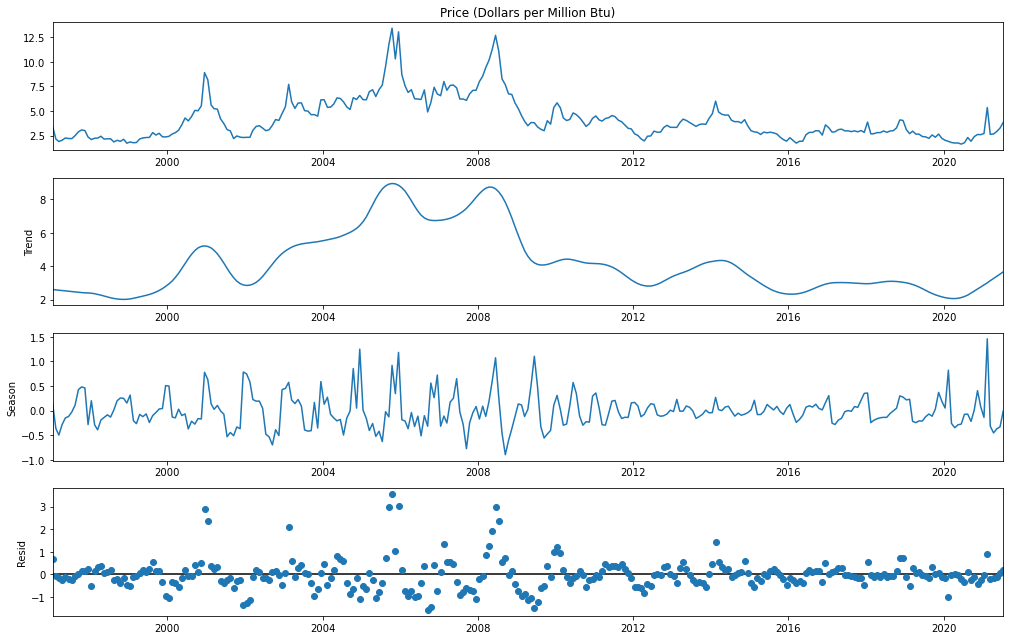

In [17]:
from statsmodels.tsa.seasonal import STL
res = STL(nat_gas['Price (Dollars per Million Btu)'],period=12).fit()
ax=res.plot()
plt.show()

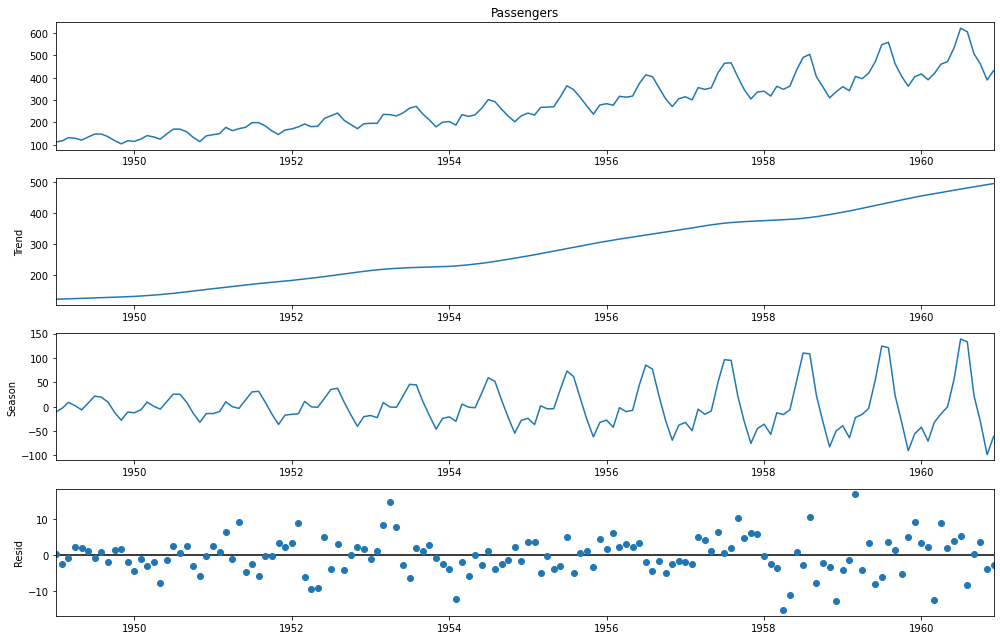

In [18]:
res = STL(passenger['Passengers'],period=12).fit()
ax=res.plot()
plt.show()